### Sample program for Association Analysis (Market Basket Analysis)   

#### Import libraries  

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

#### Parameters  

In [26]:
csv_in = 'online_retail_small.csv'
csv_out = 'online_retail_small_cleaned.csv'

#### Read CSV file  

In [27]:
df_all = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df_all.shape)
print(df_all.info())
display(df_all.head())

(59681, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59681 entries, 0 to 59680
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    59681 non-null  object 
 1   StockCode    59681 non-null  object 
 2   Description  59680 non-null  object 
 3   Quantity     59681 non-null  int64  
 4   InvoiceDate  59681 non-null  object 
 5   UnitPrice    59681 non-null  float64
 6   CustomerID   59153 non-null  float64
 7   Country      59681 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
1,536386,84880,WHITE WIRE EGG HOLDER,36,2010-12-01 09:57:00,4.95,16029.0,United Kingdom
2,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2010-12-01 09:57:00,1.65,16029.0,United Kingdom
3,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029.0,United Kingdom
4,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom


#### Check missing values  

In [28]:
df_missing = df_all[df_all.isnull().any(axis=1)]
print(df_missing.shape[0])
display(df_missing.head())

528


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
87,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
131,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
132,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
133,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
134,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


#### Delete rows with missing values  

In [29]:
df = df_all.dropna().reset_index(drop=True)
print(df.shape)
print(df.info())
display(df.head())

(59153, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59153 entries, 0 to 59152
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    59153 non-null  object 
 1   StockCode    59153 non-null  object 
 2   Description  59153 non-null  object 
 3   Quantity     59153 non-null  int64  
 4   InvoiceDate  59153 non-null  object 
 5   UnitPrice    59153 non-null  float64
 6   CustomerID   59153 non-null  float64
 7   Country      59153 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
1,536386,84880,WHITE WIRE EGG HOLDER,36,2010-12-01 09:57:00,4.95,16029.0,United Kingdom
2,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2010-12-01 09:57:00,1.65,16029.0,United Kingdom
3,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029.0,United Kingdom
4,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom


#### Fix data type of columns  

In [30]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('int')
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59153 entries, 0 to 59152
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    59153 non-null  object        
 1   StockCode    59153 non-null  object        
 2   Description  59153 non-null  object        
 3   Quantity     59153 non-null  int64         
 4   InvoiceDate  59153 non-null  datetime64[ns]
 5   UnitPrice    59153 non-null  float64       
 6   CustomerID   59153 non-null  int32         
 7   Country      59153 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 3.4+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
1,536386,84880,WHITE WIRE EGG HOLDER,36,2010-12-01 09:57:00,4.95,16029,United Kingdom
2,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2010-12-01 09:57:00,1.65,16029,United Kingdom
3,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029,United Kingdom
4,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom


#### Check canceled invoice  

In [31]:
df['Cancel'] = df['InvoiceNo'].map(lambda x: str(x)[0])
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
0,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,C
1,536386,84880,WHITE WIRE EGG HOLDER,36,2010-12-01 09:57:00,4.95,16029,United Kingdom,5
2,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,5
3,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,5
4,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,C


In [32]:
print(df['Cancel'].value_counts())

5    59145
C        8
Name: Cancel, dtype: int64


In [33]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
0,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,C
1,536386,84880,WHITE WIRE EGG HOLDER,36,2010-12-01 09:57:00,4.95,16029,United Kingdom,5
2,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,5
3,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,5
4,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,C
...,...,...,...,...,...,...,...,...,...
59148,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713,Germany,5
59149,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713,Germany,5
59150,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713,Germany,5
59151,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713,Germany,5


#### Use only non-canceled invoices  

In [34]:
df = df[ df['Cancel']=='5' ]
print(df.shape)

(59145, 9)


#### How many invoices, items, customers, countries?  

In [35]:
top_iv = df['InvoiceNo'].value_counts()
top_sc = df['StockCode'].value_counts()
top_cs = df['CustomerID'].value_counts()
top_ct = df['Country'].value_counts()
print('#Invoices:', top_iv.size)
print(top_iv.head())
print('#StockCode:', top_sc.size)
print(top_sc.head())
print('#CustomerID:', top_cs.size)
print(top_cs.head())
print('#Country:', top_ct.size)
print(top_ct.head())

#Invoices: 2757
573576    435
568346    335
547063    294
574328    208
571653    202
Name: InvoiceNo, dtype: int64
#StockCode: 3140
85123A    315
85099B    246
22423     229
84879     213
47566     208
Name: StockCode, dtype: int64
#CustomerID: 1641
17841    971
14096    770
14911    770
12748    703
14606    468
Name: CustomerID, dtype: int64
#Country: 25
United Kingdom    53220
Germany            1576
EIRE               1174
France              988
Portugal            292
Name: Country, dtype: int64


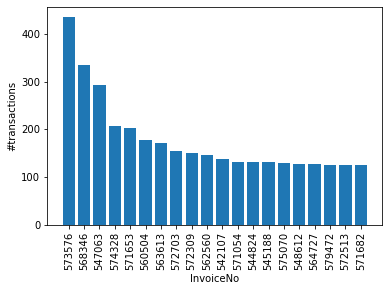

In [36]:
n_plt = 20
top_iv_idx = top_iv[:20].index.astype('str')
plt.bar(top_iv_idx, top_iv[:n_plt])
plt.xticks(rotation=90)
plt.xlabel('InvoiceNo')
plt.ylabel('#transactions')
plt.show()

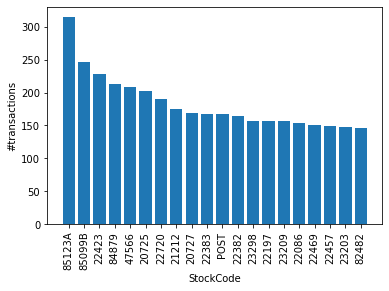

In [37]:
n_plt = 20
plt.bar(top_sc[:n_plt].index, top_sc[:n_plt])
plt.xticks(rotation=90)
plt.xlabel('StockCode')
plt.ylabel('#transactions')
plt.show()

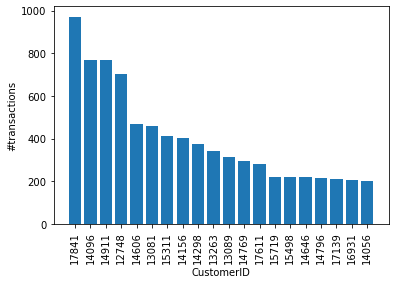

In [38]:
n_plt = 20
top_cs_idx = top_cs[:20].index.astype('str')
plt.bar(top_cs_idx, top_cs[:n_plt])
plt.xticks(rotation=90)
plt.xlabel('CustomerID')
plt.ylabel('#transactions')
plt.show()

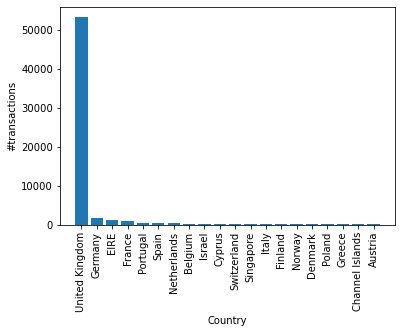

In [39]:
n_plt = 20
plt.bar(top_ct[:n_plt].index, top_ct[:n_plt])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('#transactions')
plt.show()

#### Basket Analysis (jaccard, support, confidence, lift) of the top two items  

##### Get StockCode for the top two items  

In [40]:
top_sc1 = top_sc.index[0]
top_sc2 = top_sc.index[1]
print(top_sc1, top_sc2)

85123A 85099B


##### Collect invoices of these items  

In [41]:
df_sc1 = df[ df['StockCode']==top_sc1 ]
df_sc2 = df[ df['StockCode']==top_sc2 ]

In [49]:
df_sc1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
171,536575,85123A,WHITE HANGING HEART T-LIGHT HOLDER,128,2010-12-01 16:01:00,2.55,13777,United Kingdom,5
213,536590,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 16:52:00,2.95,13065,United Kingdom,5
235,536594,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 17:22:00,2.95,15235,United Kingdom,5
239,536612,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-02 09:44:00,2.55,17850,United Kingdom,5
471,536749,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-02 13:49:00,2.95,17976,United Kingdom,5
...,...,...,...,...,...,...,...,...,...
58342,580692,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2011-12-05 15:51:00,2.95,13173,United Kingdom,5
58630,581014,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-07 09:34:00,2.95,16458,United Kingdom,5
58733,581163,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-07 14:34:00,2.95,12747,United Kingdom,5
58863,581404,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,2011-12-08 13:47:00,2.95,13680,United Kingdom,5


In [42]:
iv_all = set(df['InvoiceNo'])
iv_sc1 = set(df_sc1['InvoiceNo'])
iv_sc2 = set(df_sc2['InvoiceNo'])
iv_both = iv_sc1 & iv_sc2
iv_either = iv_sc1 | iv_sc2

In [43]:
n_all = len(iv_all)
n_sc1 = len(iv_sc1)
n_sc2 = len(iv_sc2)
n_both = len(iv_both)
n_either = len(iv_either)
print(n_all, n_sc1, n_sc2, n_both, n_either)

2757 307 244 38 513


##### Jaccard Coeff.  

In [44]:
print('Jac(sc1 => sc2):',  n_both / n_either)

Jac(sc1 => sc2): 0.07407407407407407


##### Support (支持度)  

In [45]:
print('Supp(sc1 => sc2):', n_both / n_all)

Supp(sc1 => sc2): 0.01378309756982227


##### Confidence (確信度, 信頼度)  

In [46]:
print('Conf(sc1 = sc2):', n_both / n_sc1)  # Confidence based on top_sc1
print('Conf(sc2 = sc1):', n_both / n_sc2)  # Confidence based on top_sc2

Conf(sc1 = sc2): 0.1237785016286645
Conf(sc2 = sc1): 0.1557377049180328


##### Lift (リフト値)  

In [47]:
a = n_both / n_sc2
b = n_sc1 / n_all
print('Lift(sc1 => sc2):', a/b)

Lift(sc1 => sc2): 1.3985956106156887


#### Write the current data to a CSV file  

In [48]:
df = df.drop(columns='Cancel')
df.to_csv(csv_out, index=False)